<a href="https://colab.research.google.com/github/owl-d/Basic_DeepLearning/blob/main/Doit_Ch04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***04-04. 위스콘신 유방암 데이터 세트 이용해 양성샘플(악성종양)인지 음성샘플(정상종양)인지 이진 분류***

In [1]:
#1. load_breast_cancer() 함수 호출하기
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [2]:
#2. 입력 데이터 확인하기
print(cancer.data.shape, cancer.target.shape)

(569, 30) (569,)


In [3]:
print(cancer.data[:3])

[[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
  5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
  2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
  2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01 1.599e-01 1.974e-01
  1.279e-01 2.069e-01 5.999e-02 7.456e-01 7.869e-01 4.585e+00 9.403e+01
  6.150e-03 4.006e-02 3.832e-02 2.058e-02 2.250e-02 4.571e-03 2.357e+01
  2.553e+01 1.525e+02 1.709e+03 1.444e-01 4.245e-01 4.504e-01 2.430e-01
  3.613e-01 8.758e-02]]


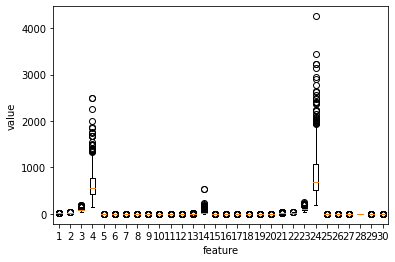

In [4]:
#3. 박스 플롯으로 30개 특성의 사분위 관찰하기 
import matplotlib.pyplot as plt

plt.boxplot(cancer.data)
plt.xlabel('feature')
plt.ylabel('value')
plt.show()

In [5]:
#4.눈에 띄는 특성 살펴보기 : 모두 면적(area)와 관련
cancer.feature_names[[3,13,23]]

array(['mean area', 'area error', 'worst area'], dtype='<U23')

In [6]:
#5. 타깃 데이터 확인하기
#0이면 음성샘플(정상), 1이면 악성샘플(악성)
#타깃은 0 또는 1의 값을 가지며, 0인 샘플은 212개, 1인 샘플은 357개이다.
import numpy as np

np.unique(cancer.target, return_counts=True)

(array([0, 1]), array([212, 357]))

In [7]:
#6. 훈련 데이터 세트 저장하기
x = cancer.data
y = cancer.target

***04-05. 로지스틱 회귀 위한 뉴런 만들기***

In [8]:
#1. train_test_split() 함수로 훈련 데이터 세트 나누기

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=42)
#stratify=y : 훈련 데이터 나눌 때 클래스 비율 동일하게 만든다. 원래 기본적으로 섞지만 일부 클래스 비율 불균형한 경우 사용
#test_size=0.2 : 입력된 데이터 세트의 20%를 테스트 세트로 사용한다. 기본은 25%
#random_state=42 : 실전에는 사용하지 않음. 난수 생성을 제어하여 결과 항상 일정하도록 만듦.

In [9]:
#2. 결과 확인하기 : 4:1의 비율(455,114)로 잘 나누어졌다.

print(x_train.shape, x_test.shape)

(455, 30) (114, 30)


In [10]:
#3. unique() 함수로 훈련 세트의 타깃 확인하기 : class 비율 유지되고 있는 것 확인

np.unique(y_train, return_counts=True)

(array([0, 1]), array([170, 285]))

**로지스틱 회귀 구현하기**

In [11]:
class LogisticNeuron:

  def __init__(self):
    self.w = None
    self.b = None

  def forpass(self, x): #정방향 계산
    z = np.sum(x*self.w) + self.b #가중합 구하기 위해 np.sum 사용
    return z

  def backprop(self, x, err): #역방향 계산
    w_grad = x * err
    b_grad = 1 * err
    return w_grad, b_grad

  def activation(self, z):  #활성화 함수 메서드
    a = 1 / (1 + np.exp(-z))  #시그모이드 계산
    return a

  def fit(self, x, y, epochs=100): #훈련 메서드
    self.w = np.ones(x.shape[1]) #가중치 개수를 x에 맞춰 1로 초기화
    self.b = 0
    for i in range(epochs):
      for x_i, y_i in zip(x, y):
        z = self.forpass(x_i)   #정방향 계산
        a = self.activation(z)  #활성화 함수 적용
        err = -(y_i - a)        #오차 계산
        w_grad, b_grad = self.backprop(x_i, err)  #역방향 계산
        self.w -= w_grad        #가중치 업데이트
        self.b -= b_grad        #절편 업데이트

  def predict(self, x):
    z = [self.forpass(x_i) for x_i in x]  #선형함수 적용
    a = self.activation(np.array(z))      #활성화 함수 적용
    return a > 0.5                        #계단 함수 적용


In [12]:
#모델 훈련하기

neuron = LogisticNeuron()
neuron.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in exp


In [13]:
#테스트 세트 사용해 모델의 정활도 평가하기

np.mean(neuron.predict(x_test) == y_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in exp


0.8245614035087719

***04-06 단일층 신경망 구현***

In [14]:
class SingleLayer:

  def __init__(self):
    self.w = None
    self.b = None
    self.losses = []

  def forpass(self, x): #정방향 계산
    z = np.sum(x*self.w) + self.b #가중합 구하기 위해 np.sum 사용
    return z

  def backprop(self, x, err): #역방향 계산
    w_grad = x * err
    b_grad = 1 * err
    return w_grad, b_grad

  def activation(self, z):  #활성화 함수 메서드
    z = np.clip(z, -100, None)
    a = 1 / (1 + np.exp(-z))  #시그모이드 계산
    return a

  def fit(self, x, y, epochs=100): #훈련 메서드
    self.w = np.ones(x.shape[1]) #가중치 개수를 x에 맞춰 1로 초기화
    self.b = 0
    for i in range(epochs):
      loss = 0
      indexes = np.random.permutation(np.arange(len(x))) #index 섞기
      for i in indexes:
        z = self.forpass(x[i])   #정방향 계산
        a = self.activation(z)  #활성화 함수 적용
        err = -(y[i] - a)        #오차 계산
        w_grad, b_grad = self.backprop(x[i], err)  #역방향 계산
        self.w -= w_grad        #가중치 업데이트
        self.b -= b_grad        #절편 업데이트
        a = np.clip(a, 1e-10, 1-1e-10)  #안전한 로그 계산 위해 클리핑 한 후 손실 누적
        loss += -(y[i]*np.log(a)+(1-y[i])*np.log(1-a))

      self.losses.append(loss/len(y)) #각 에폭마다 평균 손실 저장

  def predict(self, x):
    z = [self.forpass(x_i) for x_i in x]  #정방향 계산
    return np.array(z) > 0                #계단 함수 적용(sigmoid 함수 적용하지 않아도 z의 값으로 알 수 있음)

  def score(self, x, y):  #모델의 정확도
    return np.mean(self.predict(x)==y)

In [15]:
#단일층 신경망 훈련하기
layer = SingleLayer()
layer.fit(x_train, y_train)
layer.score(x_test, y_test)

0.9298245614035088

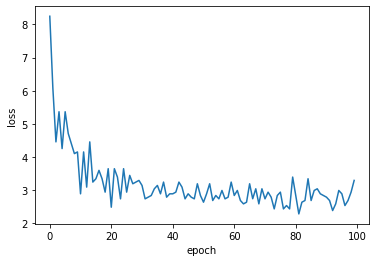

In [16]:
#손실 함수 누적값 확인하기
plt.plot(layer.losses)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

***04-07 사이킷런으로 로지스틱 회귀 수행***

In [17]:
#1. 로지스틱 손실 함수 지정하기

from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss='log', max_iter=100, tol=1e-3, random_state=42)

#loss='log' : 로지스틱 회귀 적용
#max_iter=100 : 반복 횟수 100으로 지정
#tol=le-2 : 반복할 때마다 로지스틱 손실 함수의 값이 tol에 지정한 값만큼 감소하지 않으면 반복 중단
#random_state=42 : 난수 초깃값 42로 설정

In [18]:
#2. 사이킷런으로 훈련하고 평가하기

sgd.fit(x_train, y_train) #훈련
sgd.score(x_test, y_test) #정확도 계산

0.8333333333333334

In [19]:
#3. 사이킷런으로 예측하기

sgd.predict(x_test[0:10])

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0])